In [1]:
# Librerías y configuración

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings   
import numpy as np
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [3]:
# Se cargan los datos completos

df = pd.read_csv('path/complete_data.csv')

df.head()

,fecha,intensidad,estacion,magnitud,unidad_medida,valores
0,2022-12-01 00:00:00,222.189757,Pza. de España,Dióxido de Azufre,ug/m3,1.0
1,2022-12-01 00:00:00,222.189757,Arturo Soria,Óxidos de Nitrógeno,ug/m3,18.0
2,2022-12-01 00:00:00,222.189757,Barajas,Dióxido de Nitrógeno,ug/m3,26.0
3,2022-12-01 00:00:00,222.189757,Barrio del Pilar,Óxidos de Nitrógeno,ug/m3,17.0
4,2022-12-01 00:00:00,222.189757,Pza. Castilla,Óxidos de Nitrógeno,ug/m3,16.0


In [4]:
# Se hace una columna con cada magnitud

df_magnitudes = df.pivot_table(index='fecha', columns='magnitud', values='valores')

df_magnitudes = df_magnitudes.fillna(method='ffill')

df = df.drop(columns=['magnitud', 'valores'])

df = pd.merge(df, df_magnitudes, on='fecha')

df.head()

,fecha,intensidad,estacion,unidad_medida,Benceno,Dióxido de Azufre,Dióxido de Nitrógeno,Etilbenceno,Hidrocarburos no metánicos,Hidrocarburos totales,Metano,Monóxido de Carbono,Monóxido de Nitrógeno,Ozono,Óxidos de Nitrógeno,Partículas < 10 um,Partículas < 2.5 um,Tolueno
0,2022-12-01 00:00:00,222.189757,Pza. de España,ug/m3,0.16,1.0,22.2,0.1,0.0,0.0,0.0,0.266667,1.285714,41.428571,19.769231,5.5,2.0,0.5
1,2022-12-01 00:00:00,222.189757,Arturo Soria,ug/m3,0.16,1.0,22.2,0.1,0.0,0.0,0.0,0.266667,1.285714,41.428571,19.769231,5.5,2.0,0.5
2,2022-12-01 00:00:00,222.189757,Barajas,ug/m3,0.16,1.0,22.2,0.1,0.0,0.0,0.0,0.266667,1.285714,41.428571,19.769231,5.5,2.0,0.5
3,2022-12-01 00:00:00,222.189757,Barrio del Pilar,ug/m3,0.16,1.0,22.2,0.1,0.0,0.0,0.0,0.266667,1.285714,41.428571,19.769231,5.5,2.0,0.5
4,2022-12-01 00:00:00,222.189757,Pza. Castilla,ug/m3,0.16,1.0,22.2,0.1,0.0,0.0,0.0,0.266667,1.285714,41.428571,19.769231,5.5,2.0,0.5


In [5]:
# Se crea una lista con las posibles variables explicativas de los valores de los distintos contaminantes. Añadir las nuevas columnas de las nuevas variables/datos

variables = ['intensidad']

<Axes: >

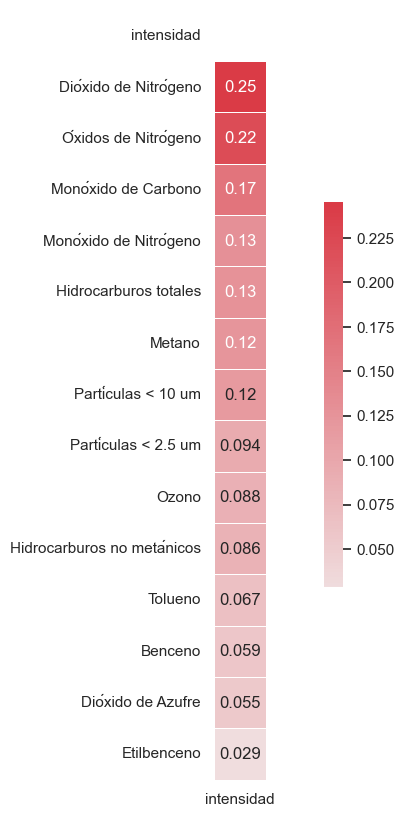

In [6]:
# Se crea un gráfico de correlacion entre los contaminantes y los valores de contaminación

plt.figure(figsize=(15, 10))

sns.set(style='white')

corr_matrix = df.corr()[variables].sort_values(by=variables, ascending=False)   

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(corr_matrix,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


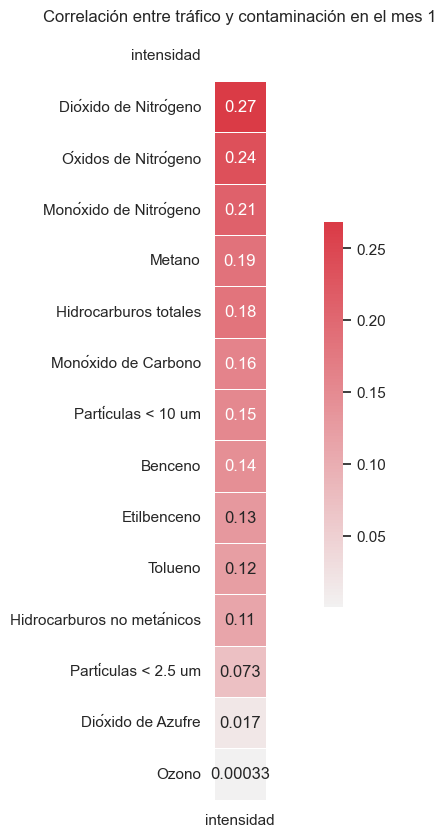

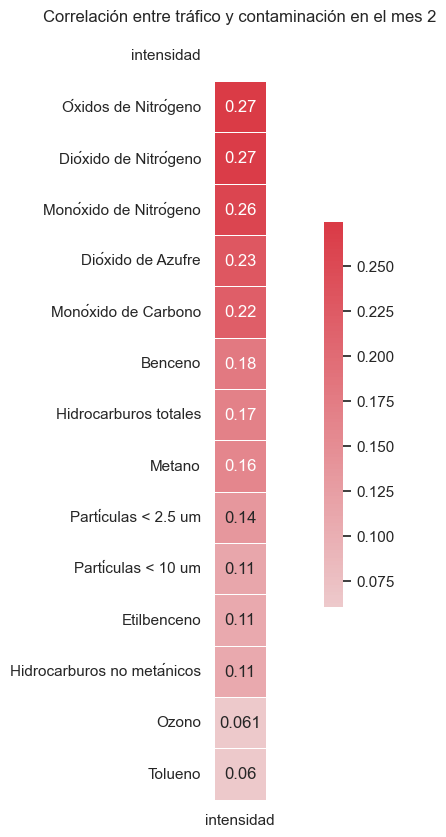

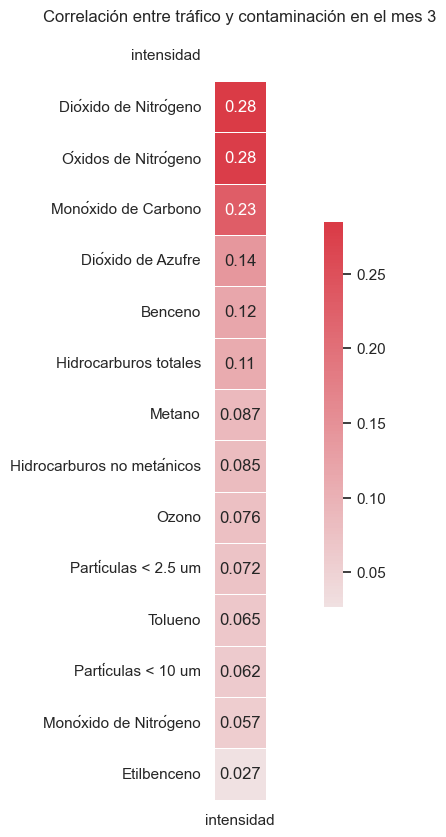

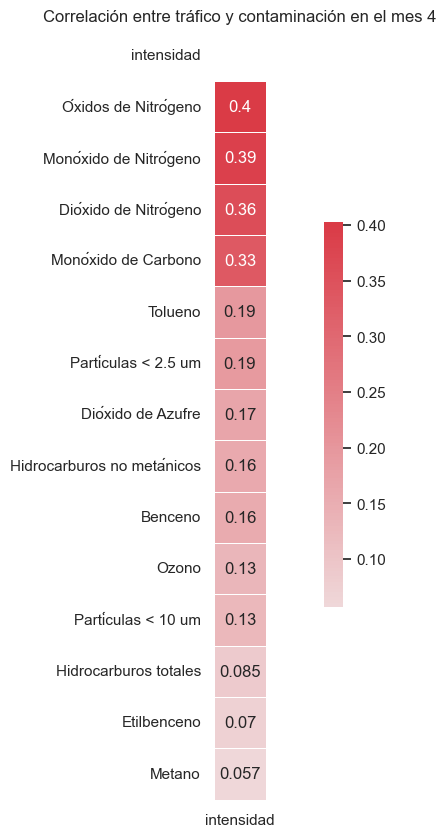

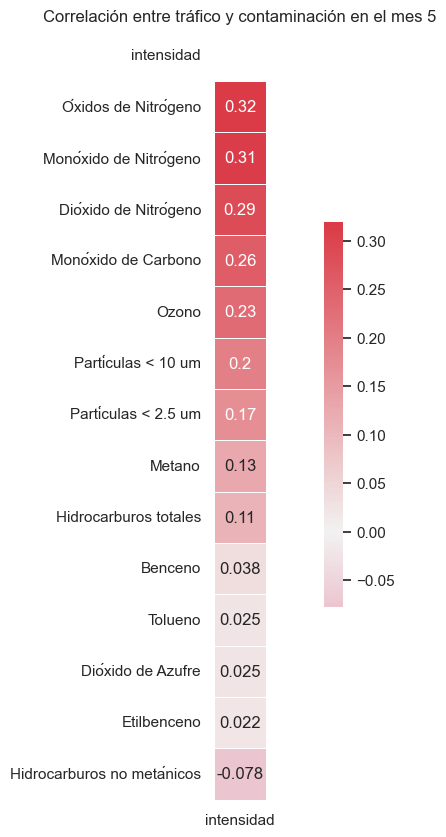

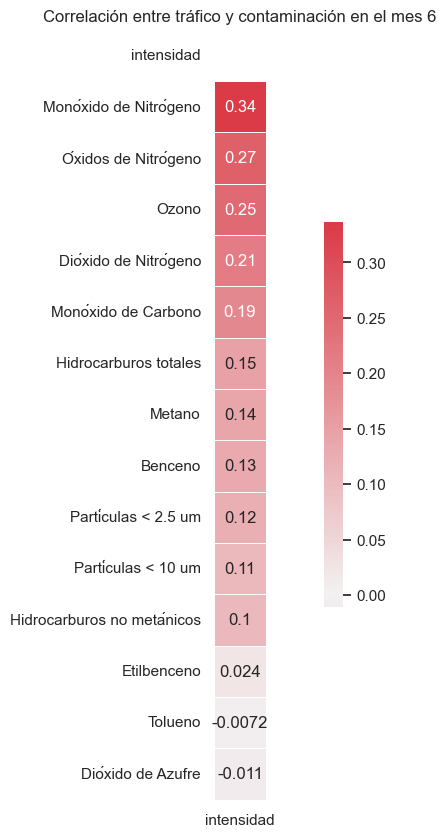

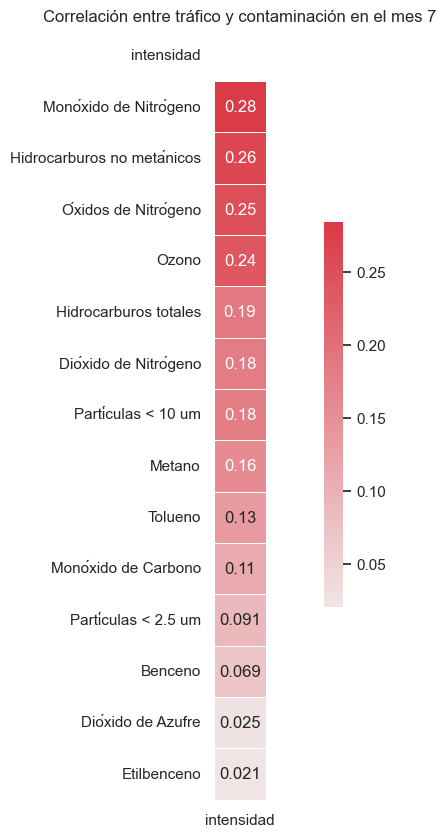

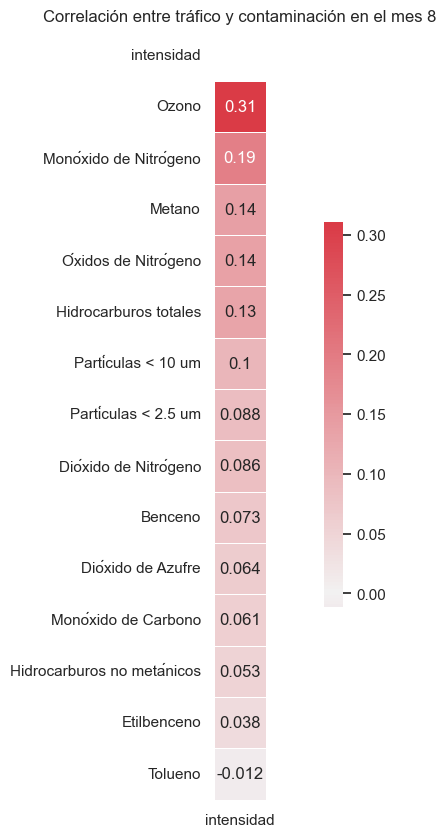

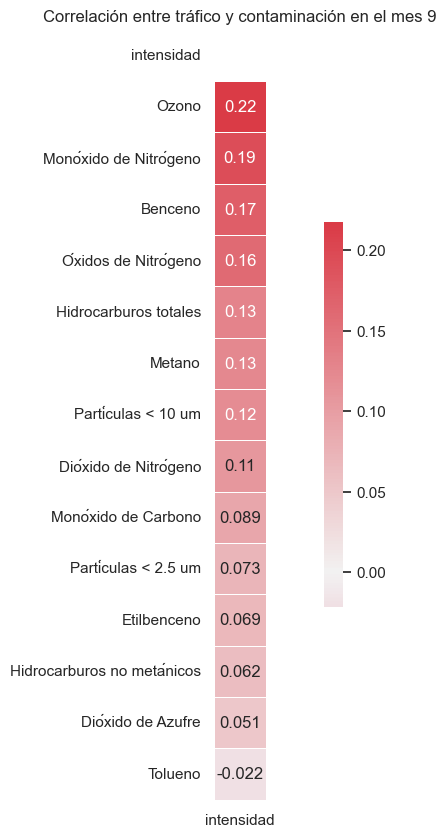

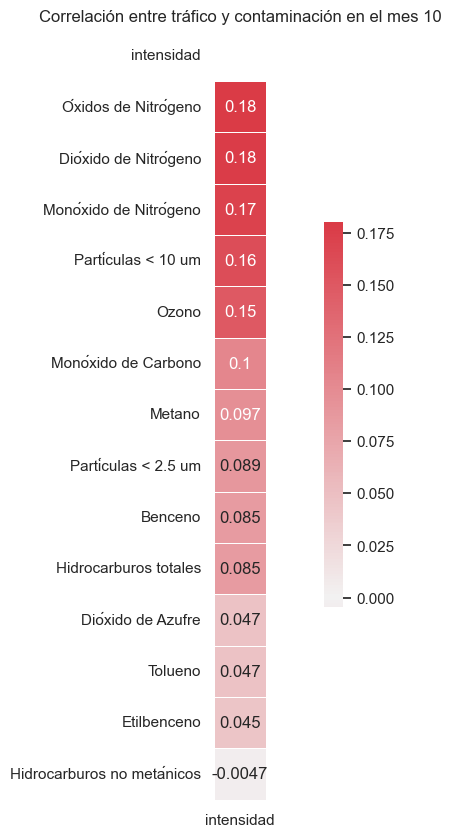

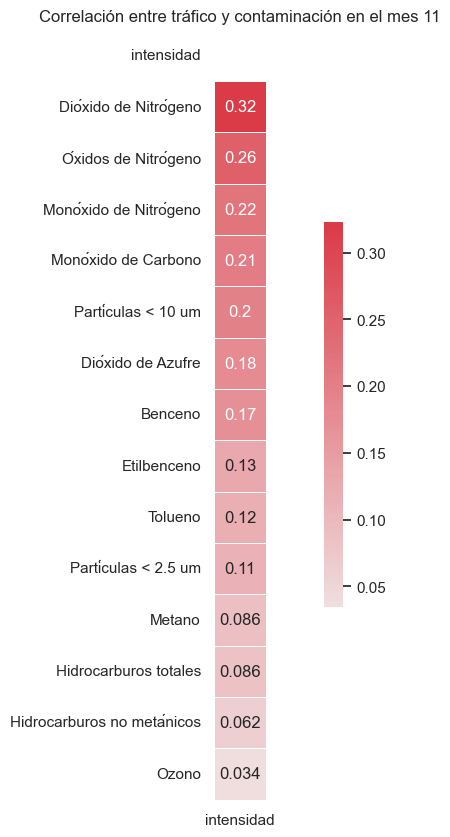

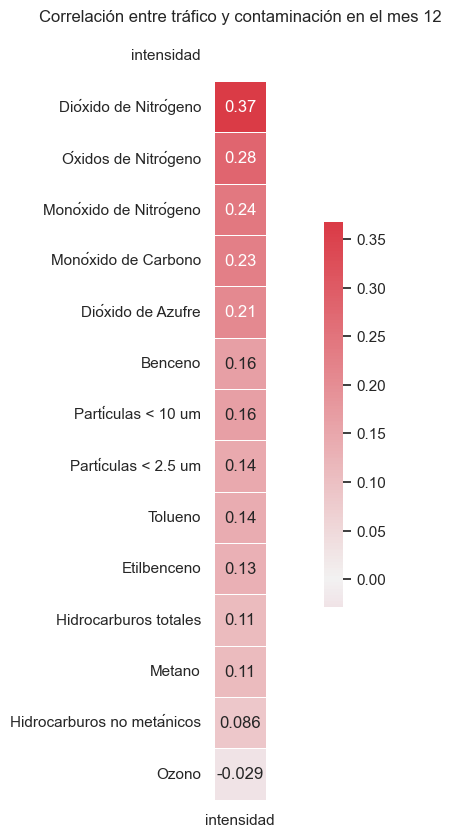

In [7]:
# Se crea el mismo gráfico para cada mes

df['fecha'] = pd.to_datetime(df['fecha'])

df.fecha[3].month

for i in tqdm(range(12)):

    df_mes = df.loc[df.fecha.dt.month == i+1]

    plt.figure(figsize=(15, 10))

    sns.set(style='white')

    corr_matrix = df_mes.corr()[variables].sort_values(by=variables, ascending=False)

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    cmap = sns.diverging_palette(0, 10, as_cmap=True)

    plt.title(f'Correlación entre tráfico y contaminación en el mes {i+1}')

    sns.heatmap(corr_matrix,
                mask=mask,
                cmap=cmap,
                center=0,
                square=True,
                annot=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})


100%|██████████| 8/8 [00:10<00:00,  1.36s/it]


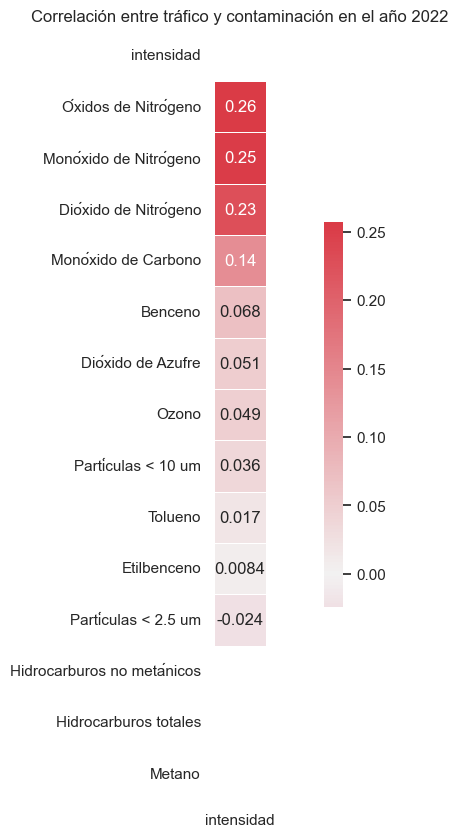

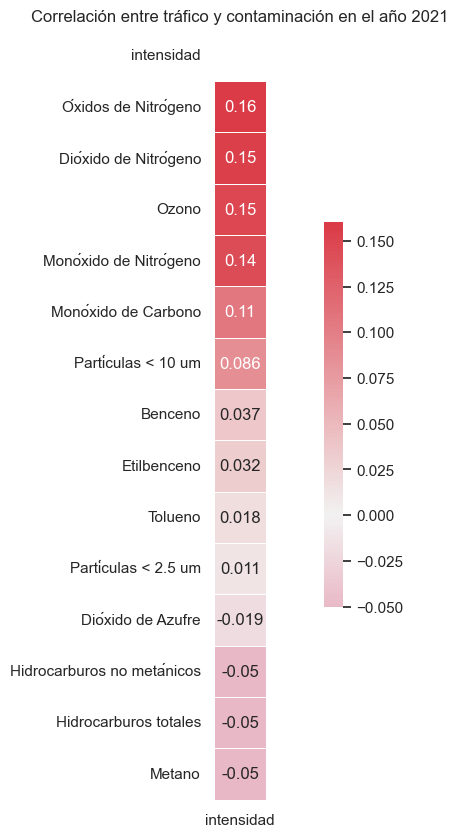

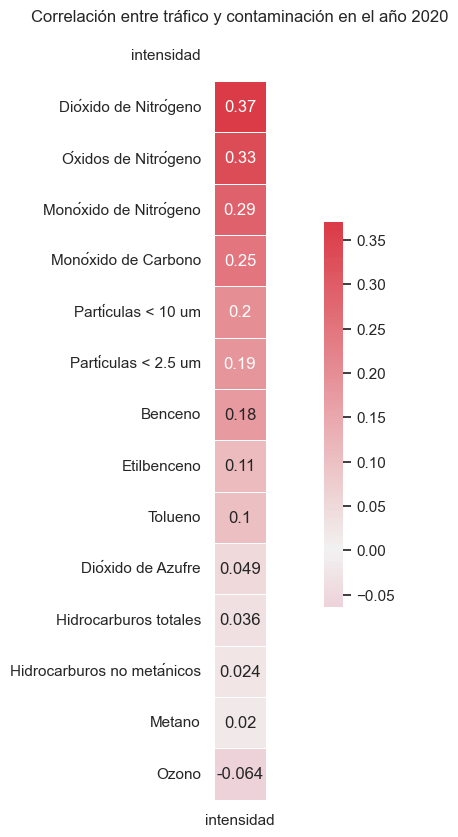

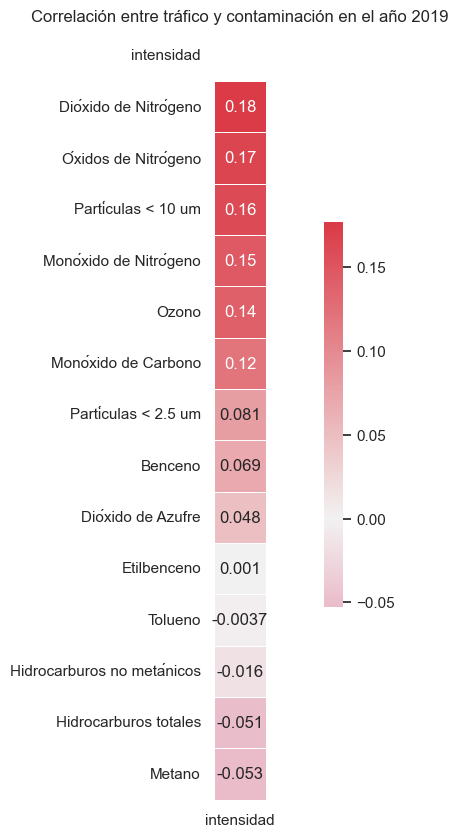

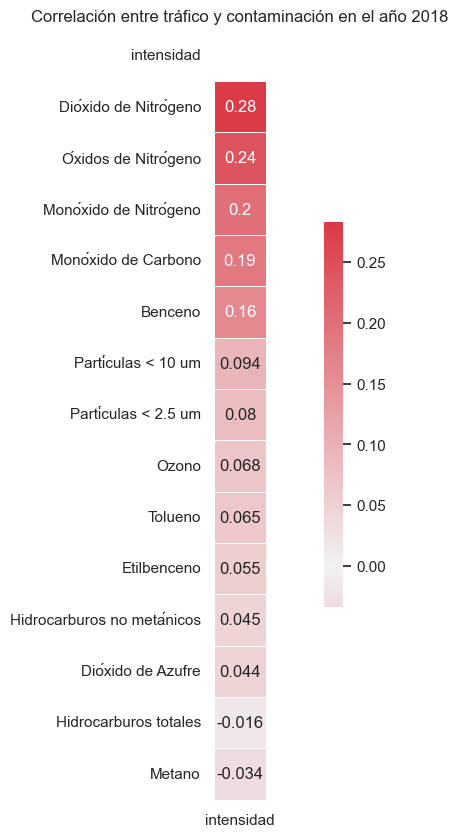

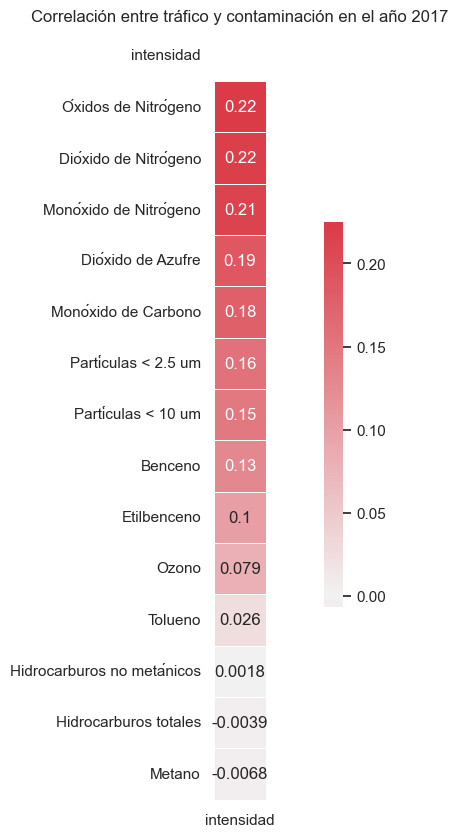

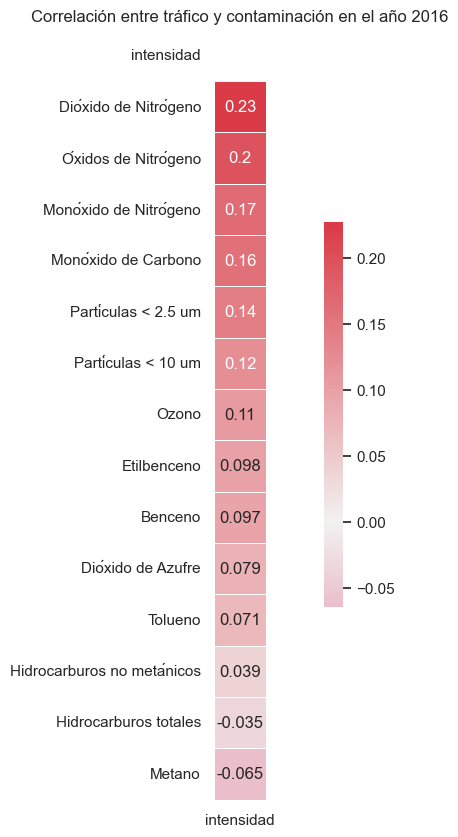

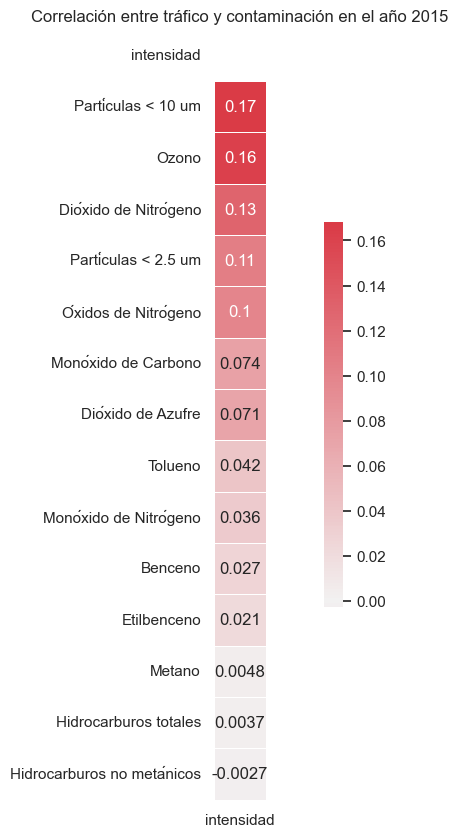

In [8]:
# Se crea el mismo gráfico para cada año

for e in tqdm((df.fecha.dt.year.unique())):

    df_año = df.loc[df.fecha.dt.year == e]

    plt.figure(figsize=(15, 10))

    sns.set(style='white')

    corr_matrix = df_año.corr()[variables].sort_values(by=variables, ascending=False)

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    cmap = sns.diverging_palette(0, 10, as_cmap=True)

    plt.title(f'Correlación entre tráfico y contaminación en el año {e}')

    sns.heatmap(corr_matrix,
                mask=mask,
                cmap=cmap,
                center=0,
                square=True,
                annot=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})

100%|██████████| 24/24 [00:23<00:00,  1.02it/s]


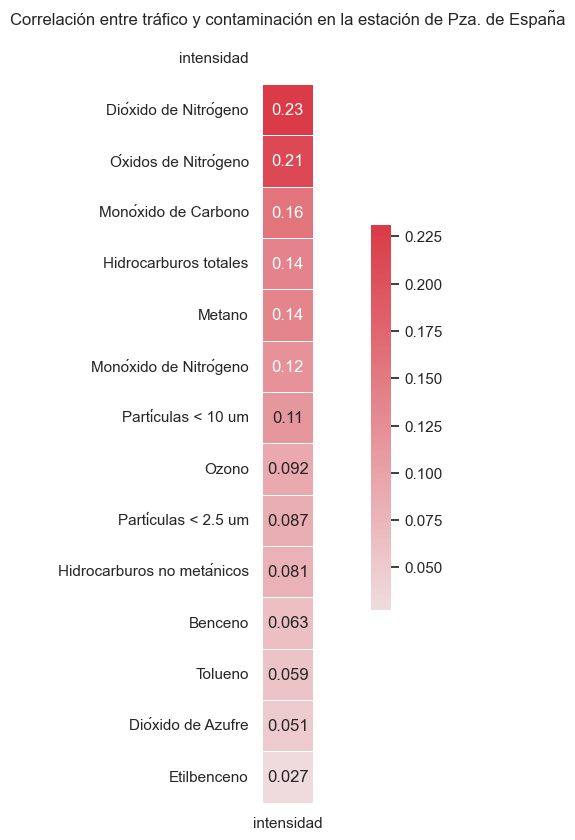

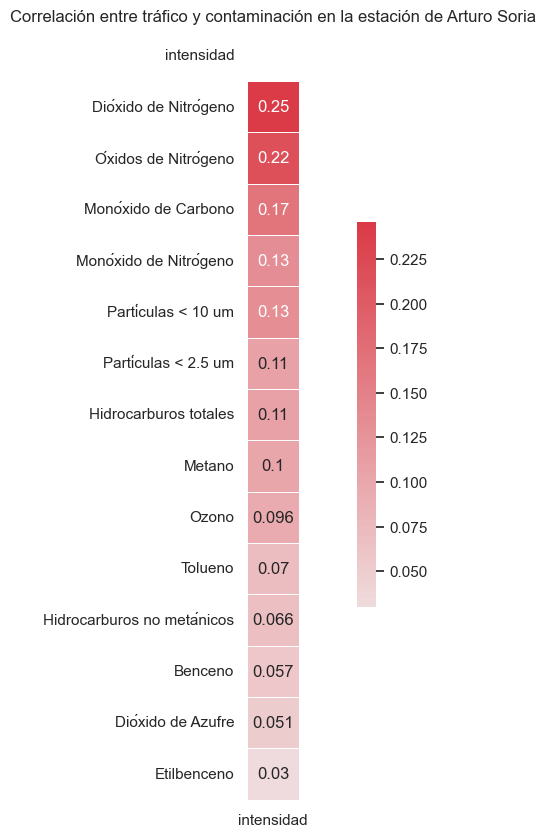

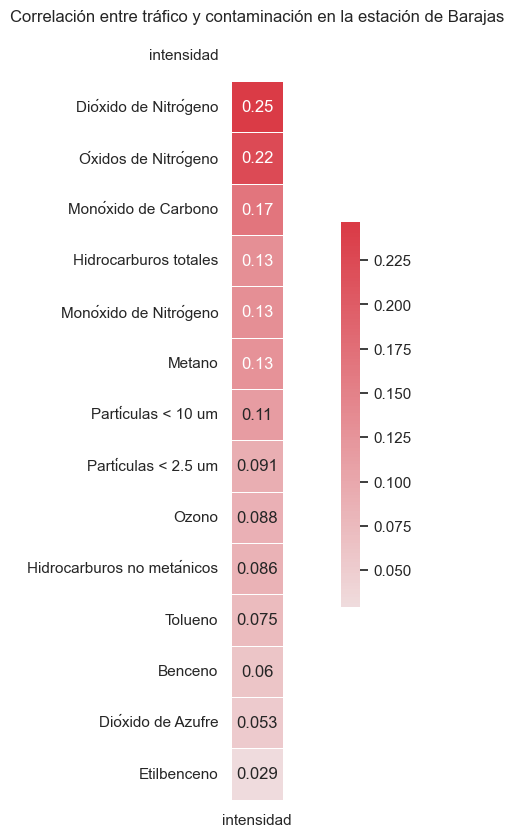

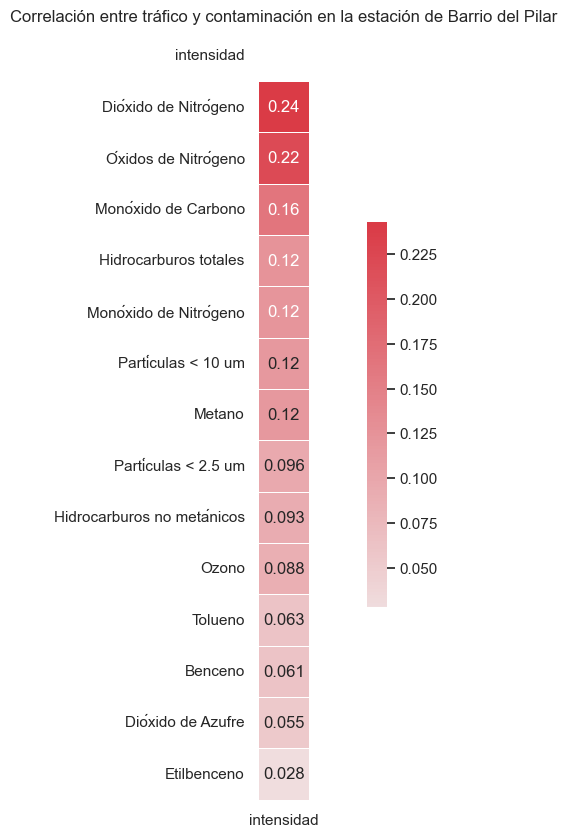

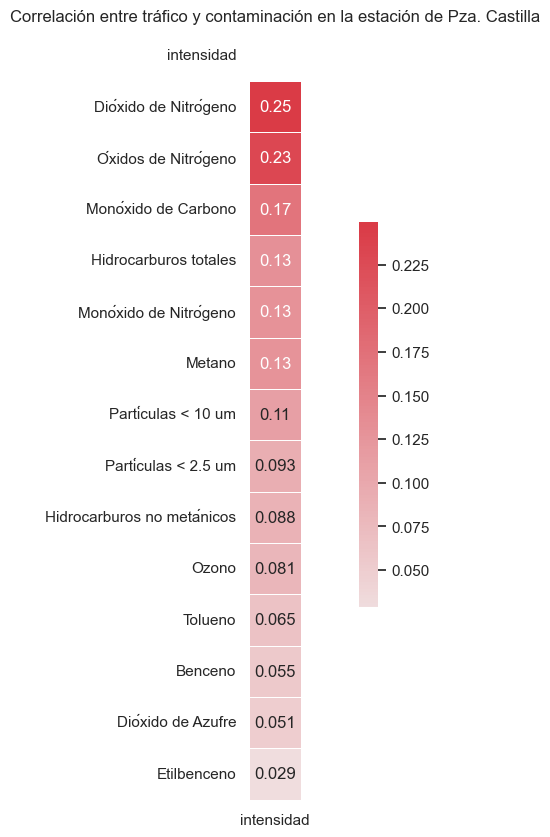

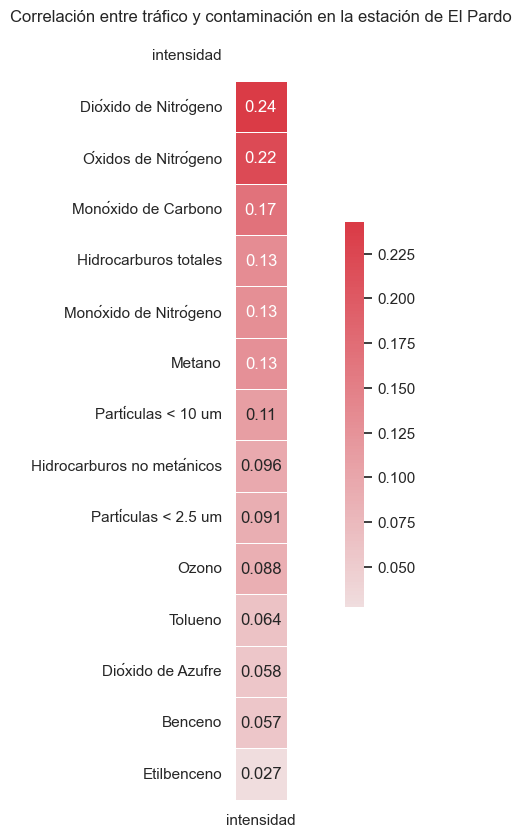

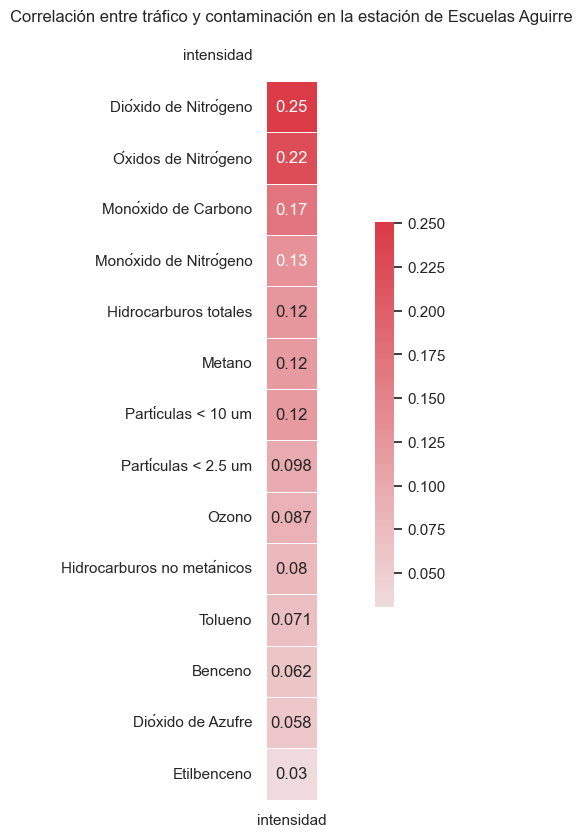

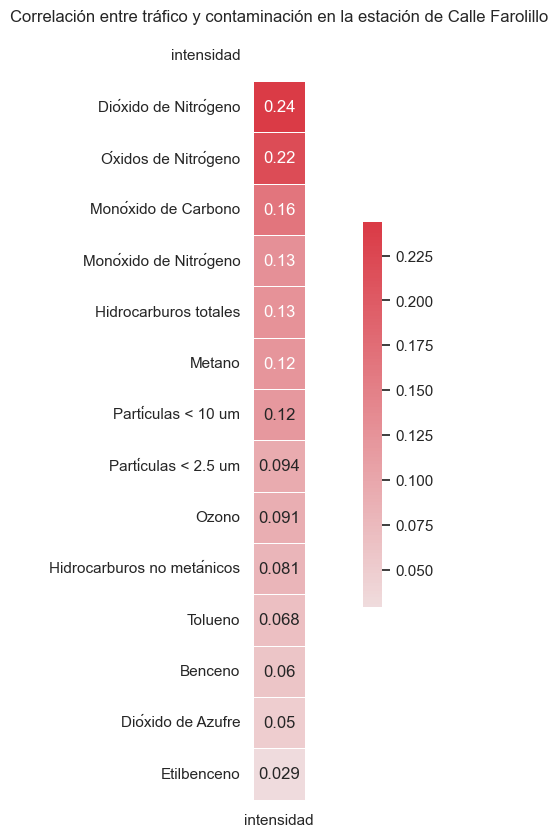

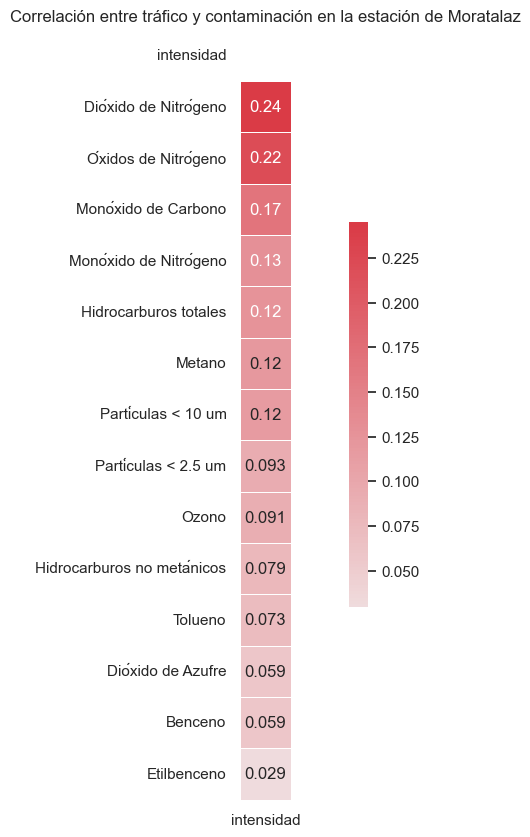

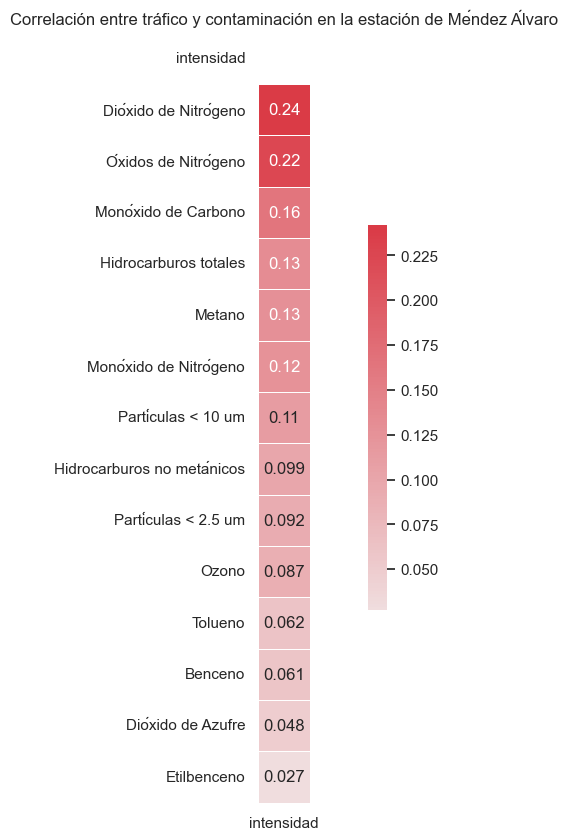

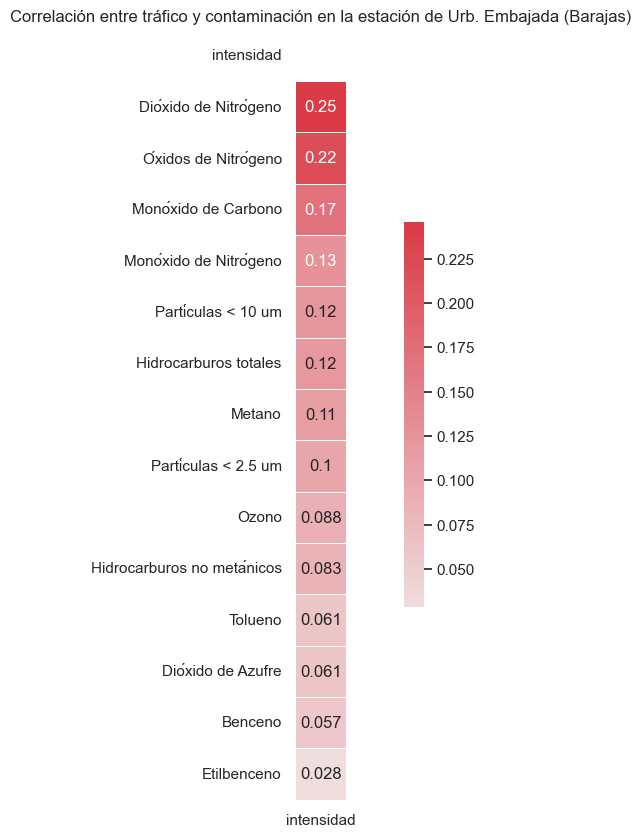

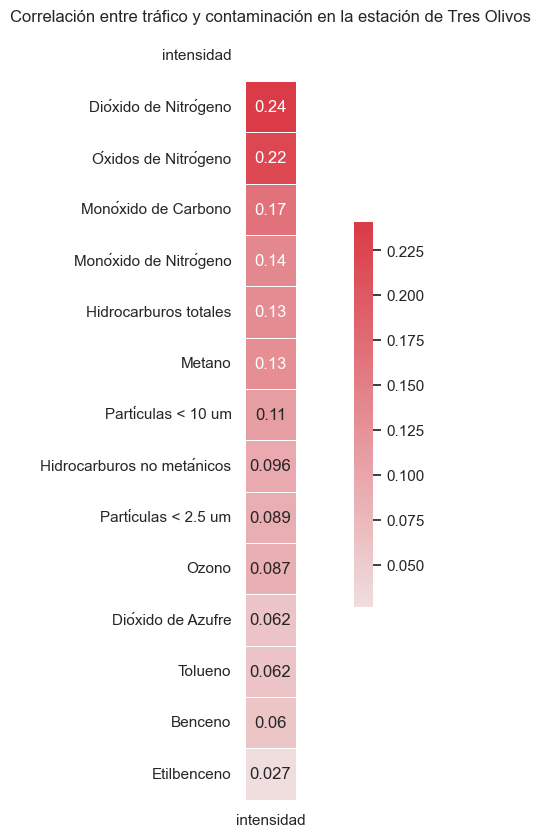

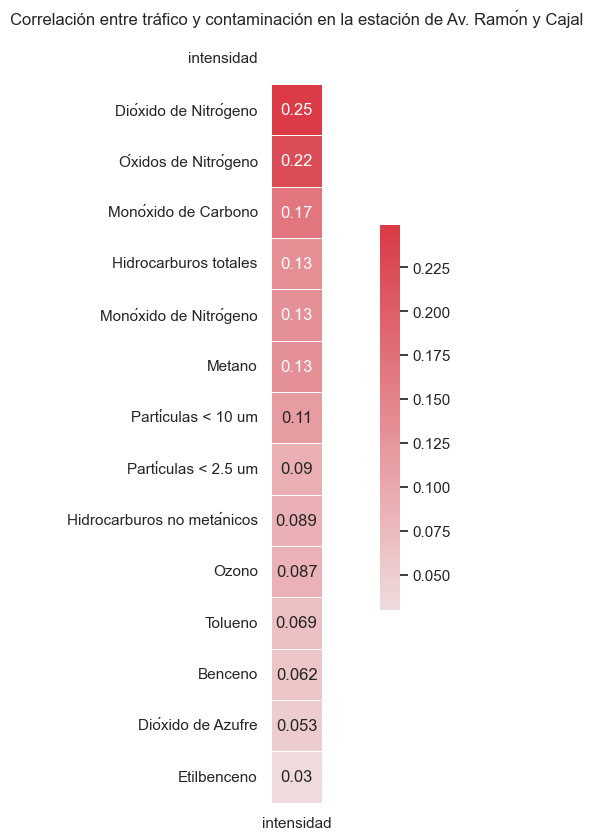

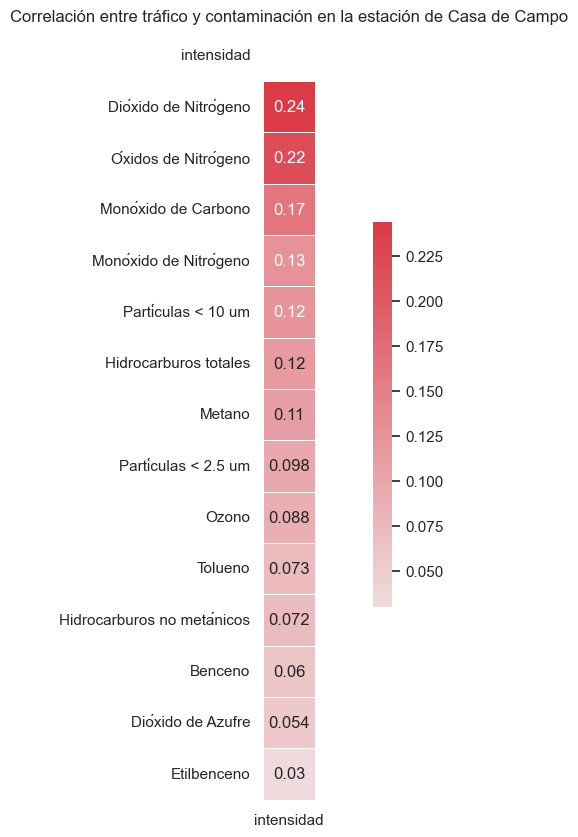

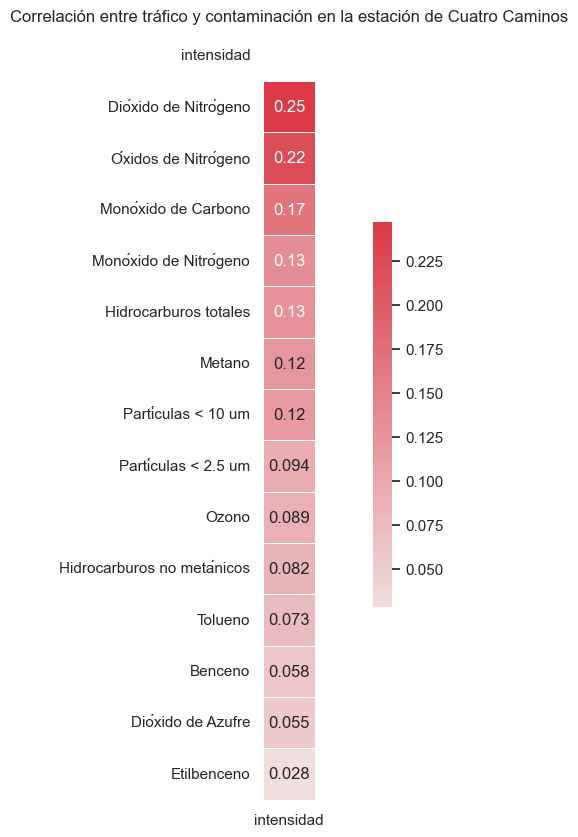

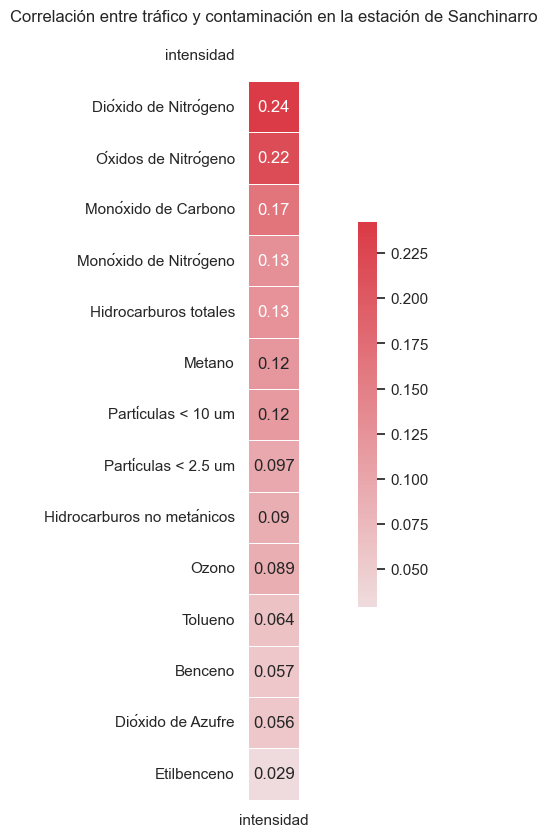

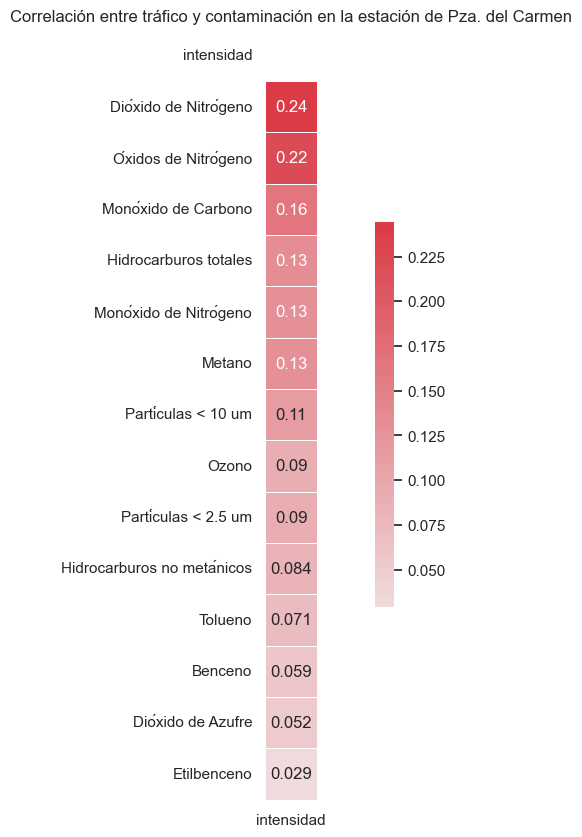

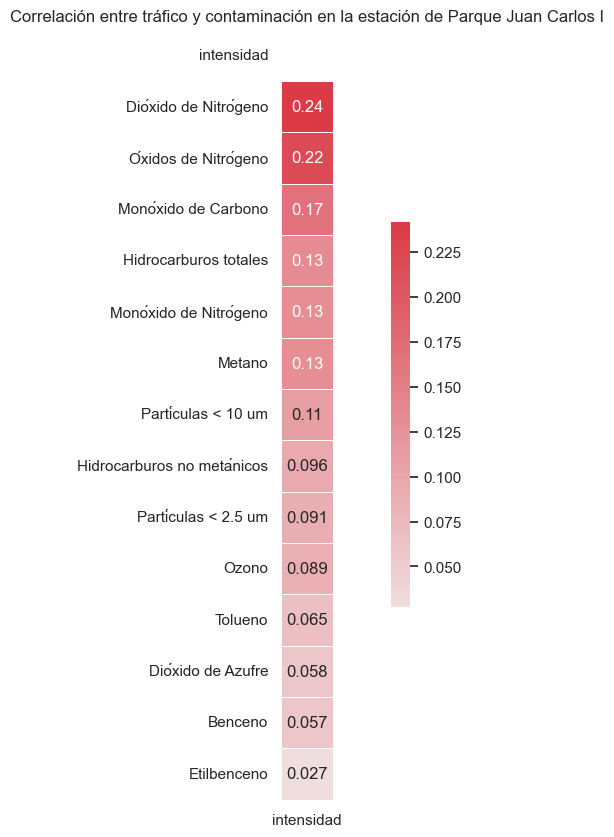

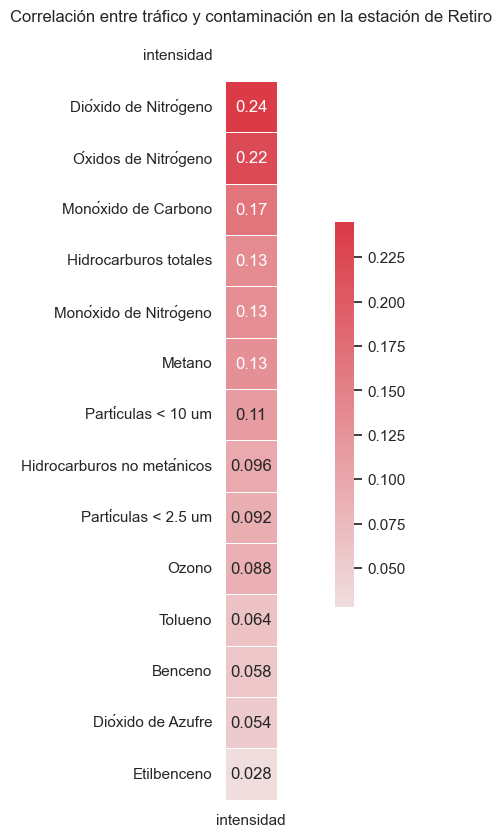

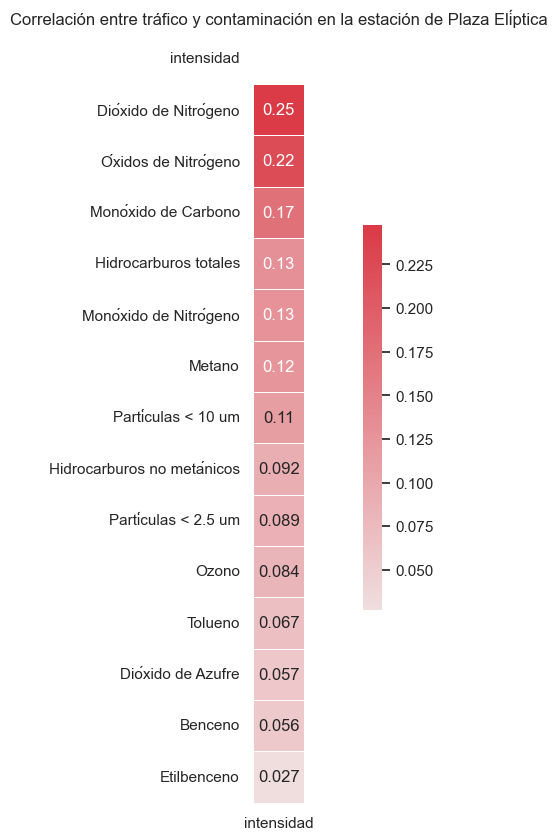

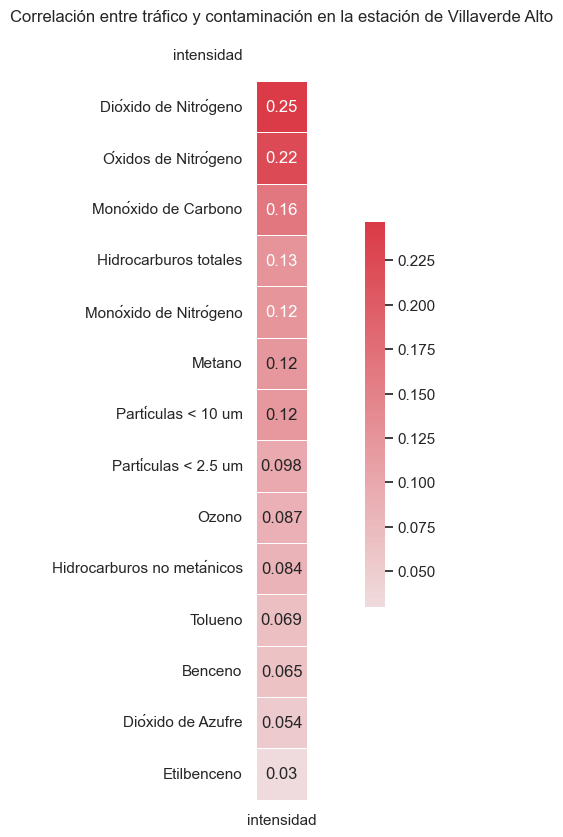

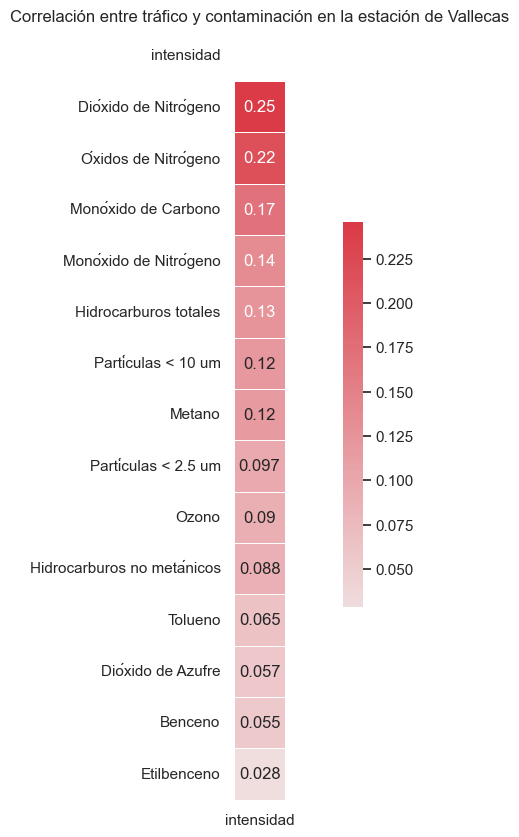

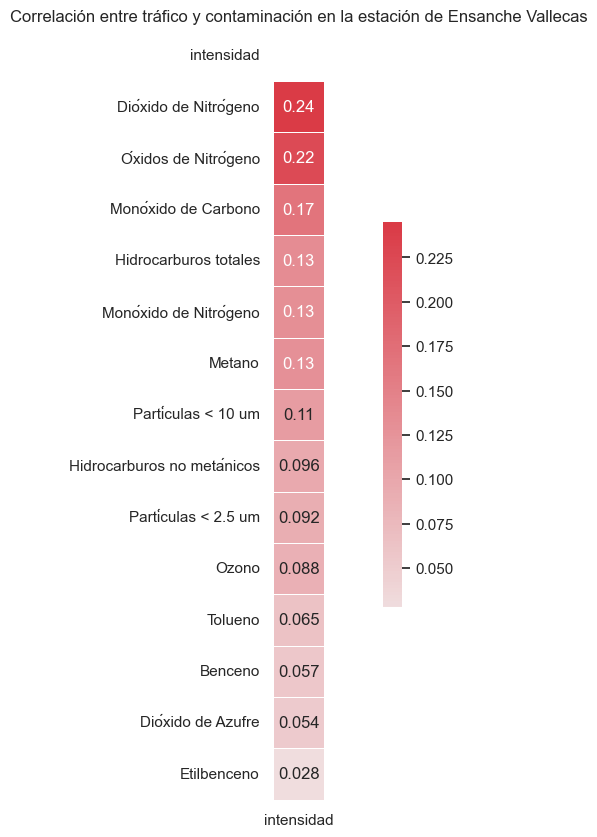

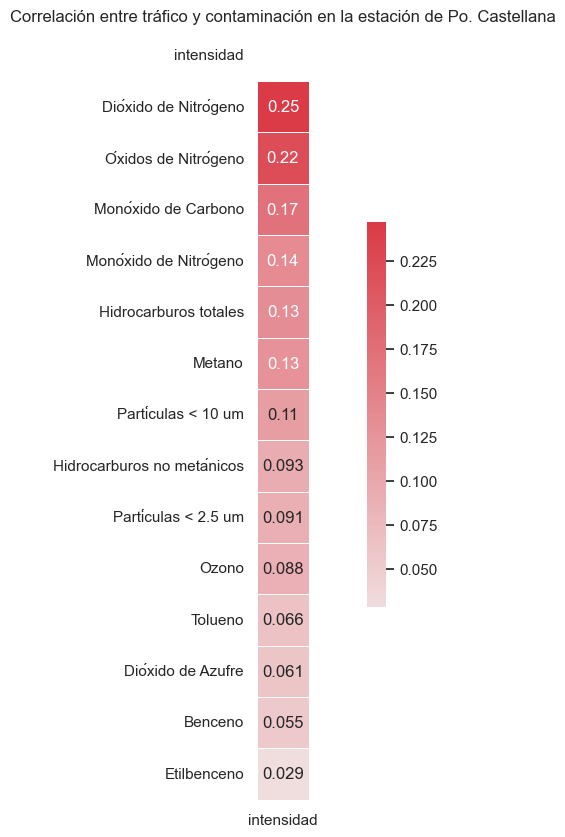

In [9]:
# Se crea el mismo gráfico para cada estación

estaciones = df.estacion.unique()

for e in tqdm(estaciones):

    df_estacion = df.loc[df.estacion == e]

    plt.figure(figsize=(15, 10))

    sns.set(style='white')

    corr_matrix = df_estacion.corr()[variables].sort_values(by=variables, ascending=False)

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    cmap = sns.diverging_palette(0, 10, as_cmap=True)

    plt.title(f'Correlación entre tráfico y contaminación en la estación de {e}')

    sns.heatmap(corr_matrix,
                mask=mask,
                cmap=cmap,
                center=0,
                square=True,
                annot=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})